In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


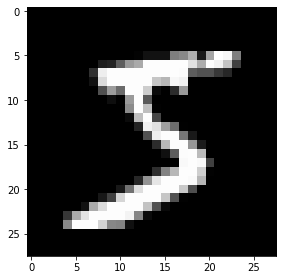

In [4]:
import skimage.io as io
io.imshow(x_train[0]) 

# 12 Feature maps, 3 Feature maps

In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(3, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 3)         327       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 3)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 75)                0         
                                                                 
 dropout (Dropout)           (None, 75)                0

In [6]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 33.
Epoch 36: early stopping
Test loss: 0.12495244294404984
Test accuracy: 0.9649999737739563


In [7]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

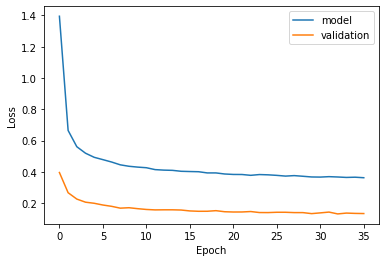

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

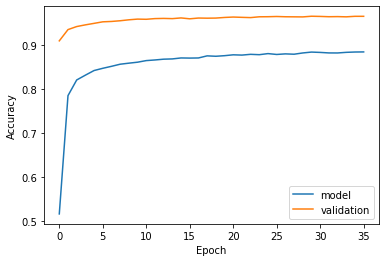

In [9]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 64, 32 filters

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout_1 (Dropout)         (None, 800)              

In [11]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 25: early stopping
Test loss: 0.02413654886186123
Test accuracy: 0.9926999807357788


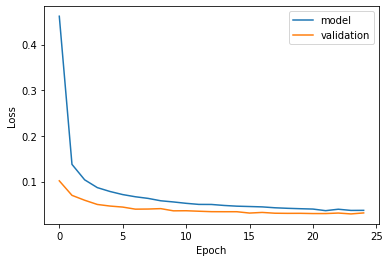

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

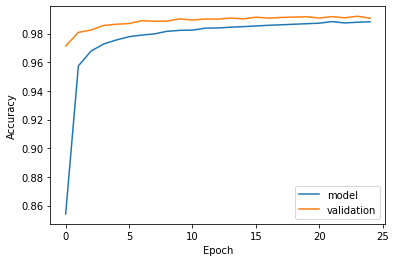

In [13]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 128, 64

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [15]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 15.
Epoch 18: early stopping
Test loss: 0.022874876856803894
Test accuracy: 0.9918000102043152


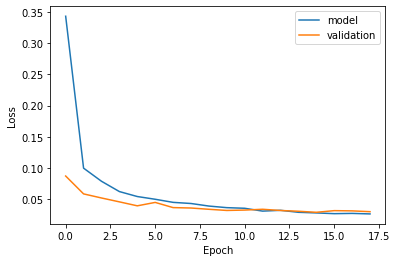

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

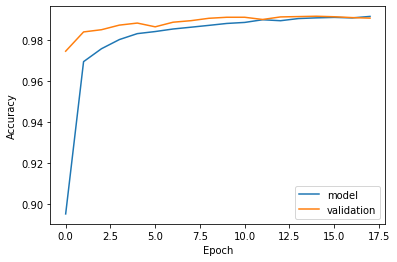

In [17]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Architechture tested
| Architecture| Number of Epochs| Test accuracy|
|:---:|:---:|:---:|
|12, 3| 36| 0.9649|
|64, 32|25| 0.9926|
|128, 64| 18|0.9918|

# Observations
- Increasing the number of filters in the convolution layer leads to better approximation of the features, which interns gives better results through out the network.
- A simple network consisting of only one layer is enough to classify the data set for a good enough convolution layer.